<a href="https://colab.research.google.com/github/ncarolan/COS302/blob/main/HW11/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COS302 - HW11

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Problem 4

Rosenbrock function: $f(x, y) = b(y − x^2)^2 + (a − x)^2$

### (A)

In [2]:
_x = 0
_y = 0
print(100 * (_y - _x**2)**2 + (1 - _x)**2)  # Rosenbrock example

1


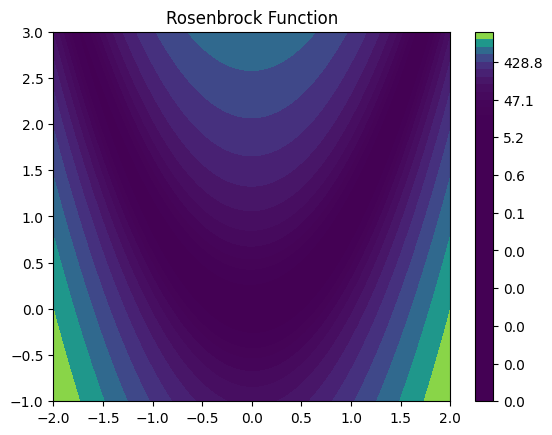

In [3]:
x,y = np.meshgrid(np.linspace(-2, 2, 1000), np.linspace(-1, 3, 1000))  # sample x in [-2,2], y in [-1,3]

z = 100 * (y - x**2)**2 + (1 - x)**2

levels = np.logspace(np.log10(z.min()), np.log10(z.max()), 50)

fig, ax = plt.subplots()
plt.title("Rosenbrock Function")
ctf = ax.contourf(x, y, z, levels)
cbar = fig.colorbar(ctf); plt.show()

Note that the global minimum at (1,1) is not obvious in the visualization.

### (B)

We can compute the derivate of the Rosenbrock function with respect to $x$ and $y$:

$f(x, y) = b(y − x^2)^2 + (a − x)^2$

$df/dx = b * 2(y - x^2) * -2x + 2(a-x) * -1 = -4bx(y-x^2) - 2(a-x)$

$df/dy = b * 2(y-x^2) * 1 = 2b(y-x^2)$

In [4]:
def rosenbrock_grad(x, y, a=1.0, b=100.0):
  """Computes the gradient of the Rosenbrock function at point x,y."""
  dfdx = -4*b*x*(y - x**2) + 2*(x - a)
  dfdy =  2*b*(y - x**2)
  return dfdx, dfdy

### (C)

Final coords: 0.991,0.981


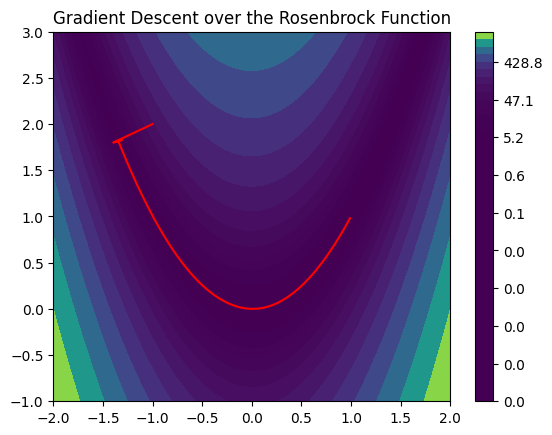

In [5]:
lr = 0.001
steps = 10000

x, y = -1, 2
path_x, path_y = [], []

for step in range(steps):
  path_x.append(x)
  path_y.append(y)
  dfdx, dfdy = rosenbrock_grad(x, y)
  x, y = x - lr*dfdx, y - lr*dfdy

print(f'Final coords: {x:.3f},{y:.3f}')

# Plot path
x_vals,y_vals = np.meshgrid(np.linspace(-2, 2, 1000), np.linspace(-1, 3, 1000))  # sample x in [-2,2], y in [-1,3]

z = 100 * (y_vals - x_vals**2)**2 + (1 - x_vals)**2
levels = np.logspace(np.log10(z.min()), np.log10(z.max()), 50)

fig, ax = plt.subplots()
plt.title("Gradient Descent over the Rosenbrock Function")
ctf = ax.contourf(x_vals, y_vals, z, levels)
plt.plot(path_x, path_y, color='red')
cbar = fig.colorbar(ctf); plt.show()

### (D)

In [6]:
def rosenbrock(xy, a=1.0, b=100.0):
  """Computes the Rosenbrock function at point xy."""
  x, y = xy
  return b * (y - x**2)**2 + (a - x)**2

def rosenbrock_grad(xy, a=1.0, b=100.0):
  """Computes the gradient of the Rosenbrock function at point xy."""
  x,y = xy
  dfdx = -4*b*x*(y - x**2) + 2*(x - a)
  dfdy =  2*b*(y - x**2)
  return dfdx, dfdy

Steps: 36
Final coords: [0.99999995 0.9999999 ]


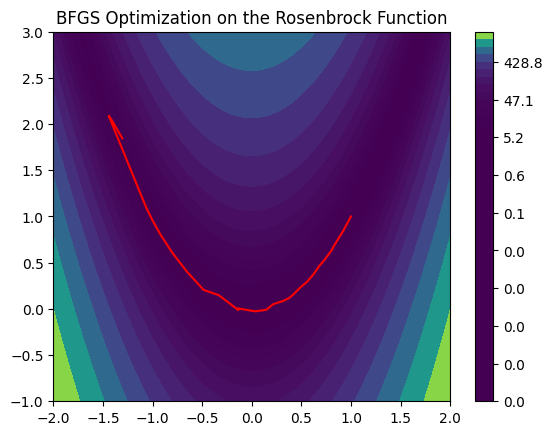

In [7]:
from scipy.optimize import minimize

steps = []

def cb(x):
  """Callback to record intermediate steps."""
  global steps
  steps.append(x)

x0 = np.array([-1,2])

result = minimize(rosenbrock, x0, jac=rosenbrock_grad, method='BFGS', callback=cb)

print(f'Steps: {len(steps)}')
print(f'Final coords: {result.x}')

# Plot path
x_vals,y_vals = np.meshgrid(np.linspace(-2, 2, 1000), np.linspace(-1, 3, 1000))  # sample x in [-2,2], y in [-1,3]

z = 100 * (y_vals - x_vals**2)**2 + (1 - x_vals)**2
levels = np.logspace(np.log10(z.min()), np.log10(z.max()), 50)

fig, ax = plt.subplots()
plt.title("BFGS Optimization on the Rosenbrock Function")
ctf = ax.contourf(x_vals, y_vals, z, levels)
path_x, path_y = [a[0] for a in steps], [a[1] for a in steps]
plt.plot(path_x, path_y, color='red')
cbar = fig.colorbar(ctf); plt.show()

The BFGS algorithm takes a shorter path to the global minimum that does not strictly follow the first derivative.